#  In Depth: Principal Component Analysis

- unsupervised algorithms
- dimensionality reduction
- noise filtering
- feature extraction, engineering

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns;

sns.set()

## Introducing Principal Component Analysis

In [2]:
rng = np.random.RandomState()
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
X

array([[ 0.29352182,  0.75265179],
       [-0.10657667, -0.12111696],
       [ 0.26932804,  0.50817416],
       [-0.03242678, -0.20872671],
       [-0.10710985, -0.27514933],
       [ 0.22559036,  0.55202259],
       [ 0.39791653,  0.97242155],
       [ 0.24327528,  0.61174521],
       [-0.01494767,  0.04968946],
       [-0.15945656, -0.31620475],
       [-0.60128802, -1.27676463],
       [-0.68473856, -1.39718969],
       [-0.10097711, -0.25599696],
       [ 0.3056781 ,  0.97482823],
       [-0.10160989, -0.39322195],
       [-0.05720377,  0.04942747],
       [ 0.12323801,  0.32501636],
       [-0.06318145, -0.11003777],
       [ 0.35378105,  0.69025198],
       [ 0.58209366,  1.53100458],
       [-0.72777952, -1.6480327 ],
       [ 0.10346911,  0.31460901],
       [ 0.08409478,  0.2313791 ],
       [ 0.32072219,  0.6950672 ],
       [ 0.48952421,  1.10172385],
       [ 0.33584947,  0.81076062],
       [-0.53496262, -1.3039968 ],
       [ 0.55120503,  1.18950269],
       [-0.04617643,

(-1.3034404218473117,
 1.0645287389146634,
 -3.0244456603409886,
 2.6248965784351874)

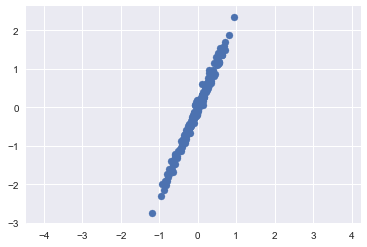

In [3]:
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal')

- unsupervised learning problem attempts to learn about the relationship between the **x** and **y** values

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [5]:
print(pca.components_)

[[-0.39172647 -0.92008172]
 [-0.92008172  0.39172647]]


**components** to define the direction of the vector

In [6]:
print(pca.explained_variance_)

[0.97521766 0.00153957]


**explained variance** to define the squared-length of the vector

(-1.3034404218473117,
 1.0645287389146634,
 -3.0244456603409886,
 2.6248965784351874)

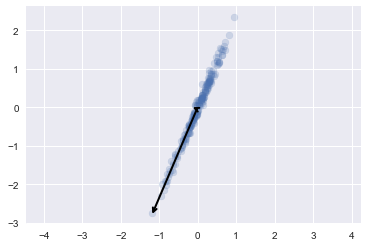

In [7]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowProps = dict(arrowstyle = '->',
                      linewidth  = 2,
                      shrinkA    = 0,
                      shrinkB    = 0)
    ax.annotate('', v1, v0, arrowprops = arrowProps)
    
#### plot data ###
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)

for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    
    draw_vector(pca.mean_, pca.mean_ + v)
    
plt.axis('equal')

### Principal Components Rotation

[(-3, 3.1),
 Text(0,0.5,'component 2'),
 (-5, 5),
 Text(0.5,0,'component 1'),
 Text(0.5,1,'principal components')]

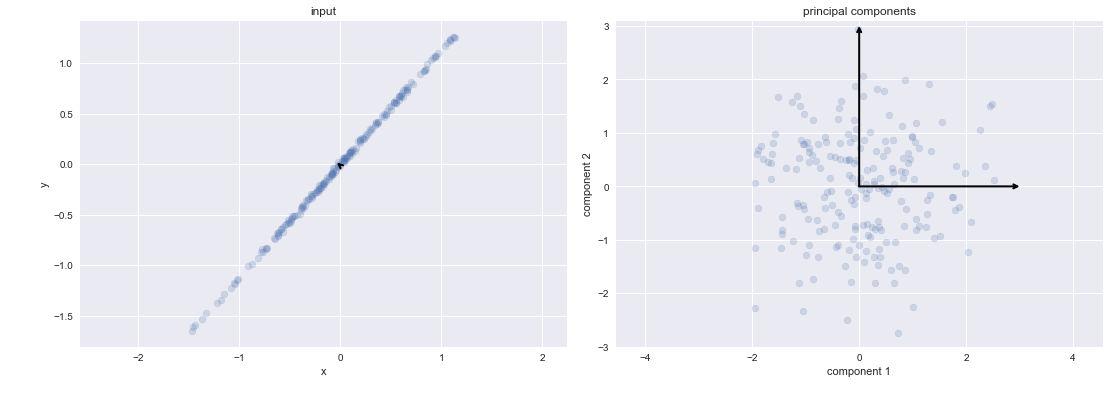

In [8]:
rng = np.random.RandomState()
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
pca = PCA(n_components=2, whiten=True)
pca.fit(X)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

### plot data ###
ax[0].scatter(X[:, 0], X[:, 1], alpha=0.2)

for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v, ax=ax[0])

ax[0].axis('equal')
ax[0].set(xlabel='x', ylabel='y', title='input')

### plot principal components
X_pca = pca.transform(X)
ax[1].scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.2)

draw_vector([0, 0], [0, 3], ax=ax[1])
draw_vector([0, 0], [3, 0], ax=ax[1])

ax[1].axis('equal')
ax[1].set(xlabel = 'component 1', ylabel = 'component 2',
          title  = 'principal components',
          xlim   = (-5, 5), ylim = (-3, 3.1))

## PCA as dimensionality reduction

In [9]:
pca = PCA(n_components = 1)
pca.fit(X)
X_pca = pca.transform(X)

print('original shape: ', X.shape)
print('transformed shape: ', X_pca.shape)

original shape:  (200, 2)
transformed shape:  (200, 1)


(-1.6324695629319352,
 1.2860611429535573,
 -1.8560118962395435,
 1.4694475882638003)

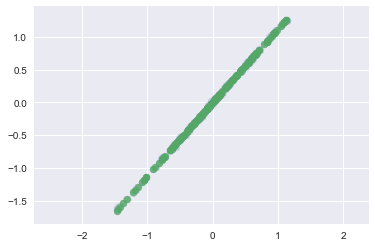

In [10]:
X_new = pca.inverse_transform(X_pca)

plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal')

- light points are the original data,
- dark points are the projected version
- reduced-dimension dataset is in some senses **good enough** to encode the most important relationship between the points

## PCA for visualization : Hand-written digits

In [11]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [12]:
pca = PCA(2)
projected = pca.fit_transform(digits.data)

print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


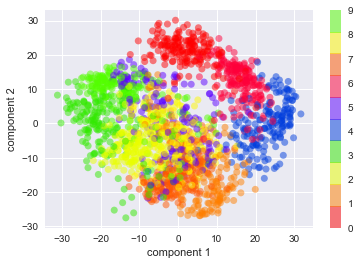

In [13]:
plt.scatter(projected[:, 0], projected[:, 1],
            c = digits.target, edgecolor='none', alpha=0.5,
            cmap = plt.cm.get_cmap('prism', 10))

plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()

## What do the components mean?

### Digits Pixel Components

In [14]:
def plot_pca_components(x, coefficients=None, mean=0, components=None, imshape=(8,8),
                        n_components=8, fontsize=2, show_mean=True):
    
    if coefficients is None:
        coefficients = x
    
    if coefficients is None:
        components = np.eye(len(coefficients), len(x))
        
    mean = np.zeros_like(x) + mean
    
    fig = plt.figure(figsize=(1.2 * (5 + n_components), 1.2 * 2))
    g   = plt.GridSpec(2, 4 + bool(show_mean) + n_components, hspace=0.3)
    
    def show(i, j, x, title=None):
        ax = fig.add_subplot(g[i, j], xticks=[], yticks=[])
        ax.imshow(x.reshape(imshape), interpolation='nearest')
        
        if title:
            ax.set_title(title, fontsize=fontsize)
            
    show(slice(2), slice(2), x, 'True')
    
    approx = mean.copy()
    
    counter = 2
    
    if show_mean:
        show(0, 2, np.zeros_like(x) + mean, r'$\mu$')
        show(1, 2, approx, r'$1 \cdot \mu$')
        counter += 1
        
    for i in range(n_components):
        approx = approx + coefficients[i] * components[i]
        show(0, i + counter, components[i], r'$c_{0}$'.format(i + 1))
        show(1, i + counter, approx, r'${0:2f} \cdot c_{1}$'.format(coefficients[i], i + 1))
        
        if show_mean or i > 0 :
            plt.gca().text(0, 1.05, '$+$', ha='right', va='bottom', transform=plt.gca().transAxes, fontsize=fontsize)
            
    show(slice(2), slice(-2, None), approx, 'Approx')
    return fig

TypeError: 'NoneType' object is not subscriptable

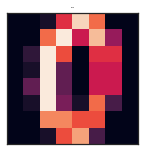

In [15]:
sns.set_style('white')

fig = plot_pca_components(digits.data[10], show_mean=False)

### Digits PCA Components

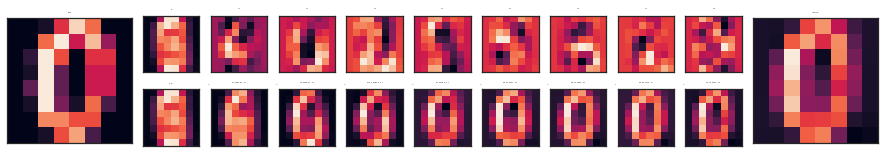

In [16]:
pca = PCA(n_components = 8)
Xprj = pca.fit_transform(digits.data)
sns.set_style('white')
fig = plot_pca_components(digits.data[10], Xprj[10], pca.mean_, pca.components_)

## Choosing the number of components

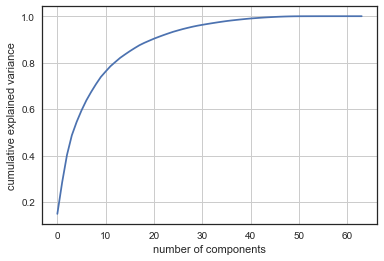

In [17]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid()

first 10 components contain approximately 75% of the variance

# PCA as Noise Filtering

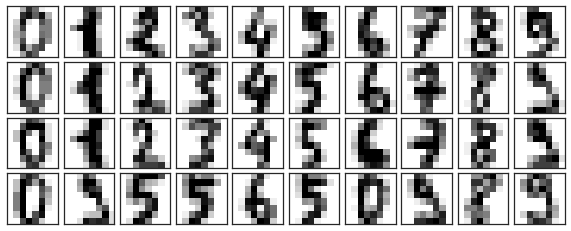

In [18]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw = {'xticks':[], 'yticks':[]},
                             gridspec_kw = dict(hspace=0.1, wspace=0.1))
    
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))

plot_digits(digits.data)

- https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html
- https://matplotlib.org/api/_as_gen/matplotlib.pyplot.imshow.html

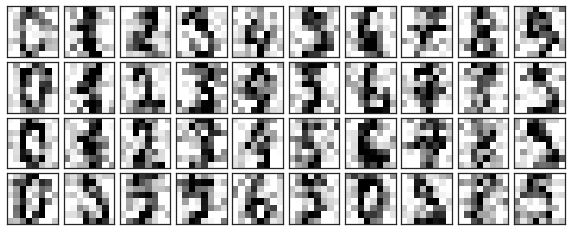

In [19]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

- http://talkingaboutme.tistory.com/849

In [20]:
pca = PCA(0.50).fit(noisy)
pca.n_components_

12

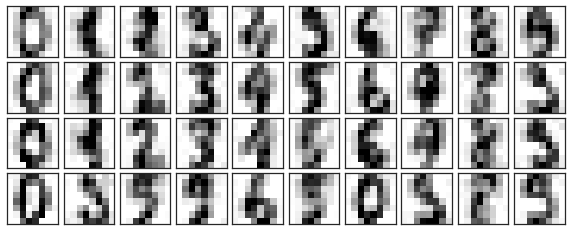

In [21]:
components = pca.transform(noisy)
filtered   = pca.inverse_transform(components)
plot_digits(filtered)

# Example: Eigenfaces

In [22]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person = 60)

print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


- RandomizedPCA contains a ranomized method to approximate the first $N$ principal components much more quickly than the standard PCA estimator

In [30]:
from sklearn.decomposition import RandomizedPCA
pca = PCA(150, svd_solver='randomized')
pca.fit(faces.data)

PCA(copy=True, iterated_power='auto', n_components=150, random_state=None,
  svd_solver='randomized', tol=0.0, whiten=False)

- http://darkpgmr.tistory.com/105 
  - 고유값(eigenvalue), 고유벡터(eigenvector)

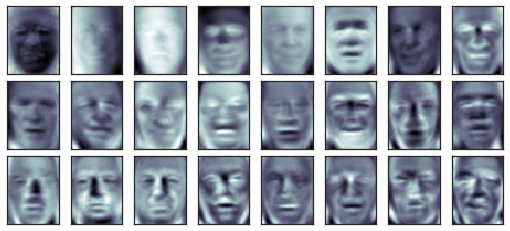

In [24]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw = {'xticks':[], 'yticks':[]},
                         gridspec_kw = dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62,47), cmap='bone')

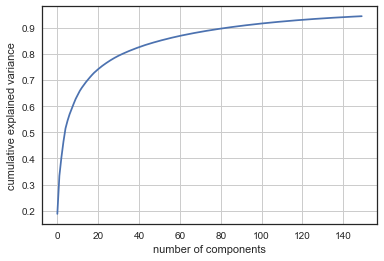

In [25]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid()

- 150 components account for just over 90% of the variance.
- using these 150 components, we would recover most of the essential characteristics of the data

In [26]:
# Compute the coponents and projected faces
pca = PCA(150, svd_solver='randomized').fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

Text(0,0.5,'150-dim\nreconstruction')

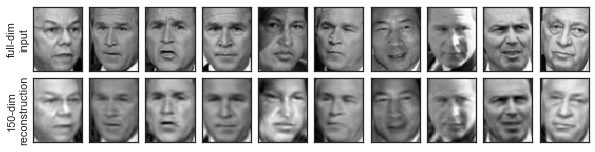

In [27]:
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw = {'xticks':[], 'yticks':[]},
                       gridspec_kw = dict(hspace=0.1, wspace=0.1))

for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow( projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction')

- our classification algorith needs to be trained on 150-dimentional data rather than 3,000-dimensional data

# Principal Component Analysis Summary

- PCA's main weakness is that it tends to be highly affected by outliers in the data

# ref

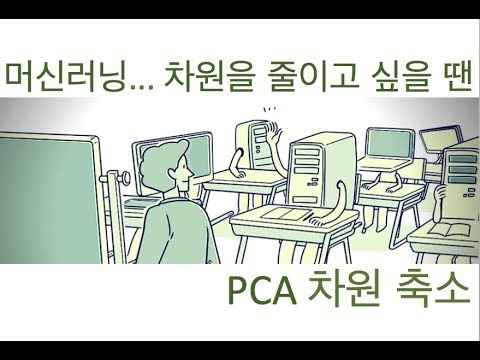

In [36]:
from IPython.display import YouTubeVideo
YouTubeVideo('DUJ2vwjRQag')

- [PCA 차원 축소 알고리즘 및 파이썬 구현 (주성분 분석)](https://github.com/minsuk-heo/python_tutorial/blob/master/data_science/pca/PCA.ipynb)

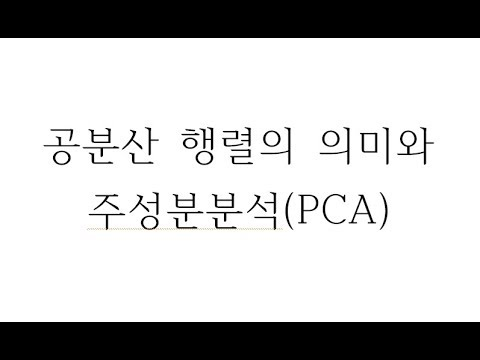

In [37]:
from IPython.display import YouTubeVideo
YouTubeVideo('jNwf-JUGWgg')

- [공돌이의 수학정리노트 > 4. 선형대수학 > [9] 주성분분석 (PCA)](https://wikidocs.net/7646)